In [29]:
import pickle

from sklearn.cluster import KMeans, MiniBatchKMeans

import pandas as pd
import numpy as np

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

from pprint import pprint

%matplotlib inline

import logging
from optparse import OptionParser
import sys
from time import time

pd.set_option('display.max_columns', None)  

from sklearn.cluster import DBSCAN
from sklearn import metrics

Loading all of my LSA and NMF Dfs:

In [20]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/clustering/df_nmf_model_10.pickle', 'rb') as f:
    df_nmf_model_10 = pickle.load(f)

In [21]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/clustering/df_nmf_model_15.pickle', 'rb') as f:
    df_nmf_model_15 = pickle.load(f)

In [22]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/clustering/df_nmf_model_20.pickle', 'rb') as f:
    df_nmf_model_20 = pickle.load(f)

In [23]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/clustering/df_nmf_model_25.pickle', 'rb') as f:
    df_nmf_model_25 = pickle.load(f)

In [24]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/clustering/df_lsa_model_10.pickle', 'rb') as f:
    df_lsa_model_10 = pickle.load(f)

In [25]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/clustering/df_lsa_model_15.pickle', 'rb') as f:
    df_lsa_model_15 = pickle.load(f)

In [26]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/clustering/df_lsa_model_20.pickle', 'rb') as f:
    df_lsa_model_20 = pickle.load(f)

In [27]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/clustering/df_lsa_model_25.pickle', 'rb') as f:
    df_lsa_model_25 = pickle.load(f)

Creating my feature spaces for each:

In [32]:
nmf_model_10_X = df_nmf_model_10.iloc[:, 2:]

In [34]:
nmf_model_15_X = df_nmf_model_15.iloc[:, 2:]

In [35]:
nmf_model_20_X = df_nmf_model_20.iloc[:, 2:]

In [36]:
nmf_model_25_X = df_nmf_model_25.iloc[:, 2:]

In [37]:
lsa_model_10_X = df_lsa_model_10.iloc[:, 2:]

In [38]:
lsa_model_15_X = df_lsa_model_15.iloc[:, 2:]

In [39]:
lsa_model_20_X = df_lsa_model_20.iloc[:, 2:]

In [40]:
lsa_model_25_X = df_lsa_model_25.iloc[:, 2:]

fitting dbscan models to each:

In [77]:
db_nmf_10 = DBSCAN(eps=.05, min_samples=3).fit(nmf_model_10_X)

Goign to try to fit the below to my data... let's see

In [112]:
db_nmf_15 = DBSCAN(eps=.08, min_samples=2).fit(nmf_model_15_X)

In [79]:
db_nmf_20 = DBSCAN(eps=.05, min_samples=3).fit(nmf_model_20_X)

In [80]:
db_nmf_25 = DBSCAN(eps=.05, min_samples=3).fit(nmf_model_25_X)

In [81]:
db_lsa_10 = DBSCAN(eps=.05, min_samples=3).fit(lsa_model_10_X)

In [82]:
db_lsa_15 = DBSCAN(eps=.05, min_samples=3).fit(lsa_model_15_X)

In [83]:
# db_lsa_20 = DBSCAN(eps=.05, min_samples=3).fit(lsa_model_20_X)

In [84]:
db_lsa_25 = DBSCAN(eps=.05, min_samples=3).fit(lsa_model_25_X)

In [76]:
core_samples_mask_nmf_10 = np.zeros_like(db_nmf_10.labels_, dtype=bool)
core_samples_mask_nmf_10[db_nmf_10.core_sample_indices_] = True
labels_nmf_10 = db_nmf_10.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_nmf_10 = len(set(labels_nmf_10)) - (1 if -1 in labels_nmf_10 else 0)
n_noise_nmf_10 = list(labels_nmf_10).count(-1)

print('Estimated number of clusters: %d' % n_clusters_nmf_10)
print('Estimated number of noise points: %d' % n_noise_nmf_10)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(nmf_model_10_X, labels_nmf_10))

Estimated number of clusters: 3
Estimated number of noise points: 18
Silhouette Coefficient: 0.400


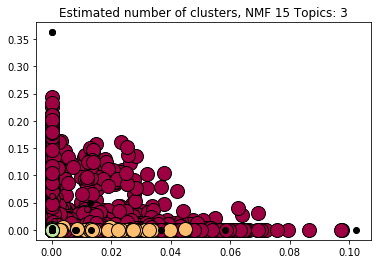

In [120]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels_nmf_10 = set(labels_nmf_10)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels_nmf_10))]
for k, col in zip(unique_labels_nmf_10, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels_nmf_10 == k)

    xy = nmf_model_10_X[class_member_mask & core_samples_mask_nmf_10]
    plt.plot(xy.values[:, 0], xy.values[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = nmf_model_10_X[class_member_mask & ~core_samples_mask_nmf_10]
    plt.plot(xy.values[:, 0], xy.values[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters, NMF 15 Topics: %d' % n_clusters_nmf_10)
plt.show()

Below looks good from metrics point of view, let's try mapping it

In [113]:
core_samples_mask_nmf_15 = np.zeros_like(db_nmf_15.labels_, dtype=bool)
core_samples_mask_nmf_15[db_nmf_15.core_sample_indices_] = True
labels_nmf_15 = db_nmf_15.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_nmf_15 = len(set(labels_nmf_15)) - (1 if -1 in labels_nmf_15 else 0)
n_noise_nmf_15 = list(labels_nmf_15).count(-1)

print('Estimated number of clusters: %d' % n_clusters_nmf_15)
print('Estimated number of noise points: %d' % n_noise_nmf_15)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(nmf_model_15_X, labels_nmf_15))

Estimated number of clusters: 5
Estimated number of noise points: 10
Silhouette Coefficient: 0.618


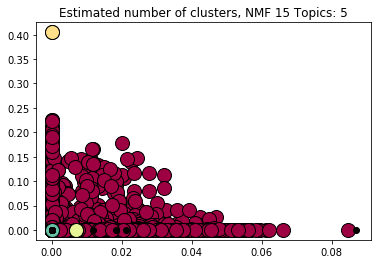

In [119]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels_nmf_15 = set(labels_nmf_15)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels_nmf_15))]
for k, col in zip(unique_labels_nmf_15, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels_nmf_15 == k)

    xy = nmf_model_15_X[class_member_mask & core_samples_mask_nmf_15]
    plt.plot(xy.values[:, 0], xy.values[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = nmf_model_15_X[class_member_mask & ~core_samples_mask_nmf_15]
    plt.plot(xy.values[:, 0], xy.values[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters, NMF 15 Topics: %d' % n_clusters_nmf_15)
plt.show()

In [86]:
core_samples_mask_nmf_20 = np.zeros_like(db_nmf_20.labels_, dtype=bool)
core_samples_mask_nmf_20[db_nmf_20.core_sample_indices_] = True
labels_nmf_20 = db_nmf_20.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_nmf_20 = len(set(labels_nmf_20)) - (1 if -1 in labels_nmf_20 else 0)
n_noise_nmf_20 = list(labels_nmf_20).count(-1)

print('Estimated number of clusters: %d' % n_clusters_nmf_20)
print('Estimated number of noise points: %d' % n_noise_nmf_20)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(nmf_model_20_X, labels_nmf_20))

Estimated number of clusters: 11
Estimated number of noise points: 184
Silhouette Coefficient: 0.289


In [87]:
core_samples_mask_nmf_25 = np.zeros_like(db_nmf_25.labels_, dtype=bool)
core_samples_mask_nmf_25[db_nmf_25.core_sample_indices_] = True
labels_nmf_25 = db_nmf_25.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_nmf_25 = len(set(labels_nmf_25)) - (1 if -1 in labels_nmf_20 else 0)
n_noise_nmf_25 = list(labels_nmf_25).count(-1)

print('Estimated number of clusters: %d' % n_clusters_nmf_25)
print('Estimated number of noise points: %d' % n_noise_nmf_25)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(nmf_model_25_X, labels_nmf_25))

Estimated number of clusters: 20
Estimated number of noise points: 253
Silhouette Coefficient: 0.155


In [89]:
core_samples_mask_lsa_10 = np.zeros_like(db_lsa_10.labels_, dtype=bool)
core_samples_mask_lsa_10[db_lsa_10.core_sample_indices_] = True
labels_lsa_10 = db_lsa_10.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_lsa_10 = len(set(labels_lsa_10)) - (1 if -1 in labels_lsa_10 else 0)
n_noise_lsa_10 = list(labels_lsa_10).count(-1)

print('Estimated number of clusters: %d' % n_clusters_lsa_10)
print('Estimated number of noise points: %d' % n_noise_lsa_10)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(lsa_model_10_X, labels_lsa_10))

Estimated number of clusters: 35
Estimated number of noise points: 904
Silhouette Coefficient: -0.116


In [92]:
core_samples_mask_lsa_15 = np.zeros_like(db_lsa_15.labels_, dtype=bool)
core_samples_mask_lsa_15[db_lsa_15.core_sample_indices_] = True
labels_lsa_15 = db_lsa_15.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_lsa_15 = len(set(labels_lsa_15)) - (1 if -1 in labels_lsa_15 else 0)
n_noise_lsa_15 = list(labels_lsa_15).count(-1)

print('Estimated number of clusters: %d' % n_clusters_lsa_15)
print('Estimated number of noise points: %d' % n_noise_lsa_15)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(lsa_model_15_X, labels_lsa_10))

Estimated number of clusters: 66
Estimated number of noise points: 2510
Silhouette Coefficient: -0.122


In [165]:
db_lsa_20 = DBSCAN(eps=.3, min_samples=3).fit(lsa_model_20_X)

In [166]:
core_samples_mask_lsa_20 = np.zeros_like(db_lsa_20.labels_, dtype=bool)
core_samples_mask_lsa_20[db_lsa_20.core_sample_indices_] = True
labels_lsa_20 = db_lsa_20.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_lsa_20 = len(set(labels_lsa_20)) - (1 if -1 in labels_lsa_20 else 0)
n_noise_lsa_20 = list(labels_lsa_20).count(-1)

print('Estimated number of clusters: %d' % n_clusters_lsa_20)
print('Estimated number of noise points: %d' % n_noise_lsa_20)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(lsa_model_20_X, labels_lsa_20))

Estimated number of clusters: 3
Estimated number of noise points: 5
Silhouette Coefficient: 0.565


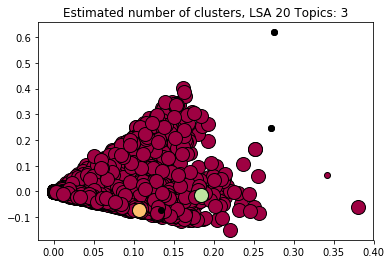

In [167]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels_lsa_20 = set(labels_lsa_20)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels_lsa_20))]
for k, col in zip(unique_labels_lsa_20, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels_lsa_20 == k)

    xy = lsa_model_20_X[class_member_mask & core_samples_mask_lsa_20]
    plt.plot(xy.values[:, 0], xy.values[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = lsa_model_20_X[class_member_mask & ~core_samples_mask_lsa_20]
    plt.plot(xy.values[:, 0], xy.values[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters, LSA 20 Topics: %d' % n_clusters_lsa_20)
plt.show()

In [152]:
clustered_labels_lsa_20 = db_lsa_20.fit_predict(lsa_model_20_X, y=None, sample_weight=None)

In [150]:
df_lsa_model_20.head()

,id,blurb,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,269726791,An artistic professional pack of playing cards...,0.118765,0.182466,-0.037672,0.039376,-0.048429,0.045518,0.009710,0.012686,0.002069,0.006844,-0.014650,0.027404,0.020749,0.015065,0.015533,-0.002469,0.010655,0.004937,-0.011222,0.014631
1,1697621882,Make it rain pancakes in FAT STACKS. \nCreate ...,0.052765,-0.033622,-0.045537,-0.032304,-0.015172,0.015924,0.008454,-0.017053,-0.022386,-0.011617,0.026820,0.029376,-0.045896,0.045269,0.014085,0.038517,-0.002483,-0.040691,-0.013559,0.030872
2,2046938895,"Endless playability, stunning artwork and fant...",0.017984,0.001343,-0.003260,0.032234,0.002442,-0.021048,0.008277,-0.000148,0.010226,-0.018665,0.009077,-0.019254,-0.009203,0.005457,-0.005860,0.011202,-0.004034,-0.017642,-0.040061,-0.009398
3,1642293087,"In 'Coral', use dice to make shapes in 3D! In ...",0.035804,-0.011564,-0.010287,0.004304,-0.009367,0.016175,0.008818,-0.045228,0.002583,-0.018973,-0.015247,0.024286,-0.059678,0.042627,0.017888,0.007787,-0.003178,-0.007208,-0.027904,-0.051965
4,932587626,Online 3D Stores for businesses that blur 3D G...,0.085045,-0.055648,-0.040125,0.035144,0.014326,-0.000312,-0.034597,-0.014971,-0.037944,0.016826,-0.000892,-0.057838,0.042626,-0.003969,0.002463,0.042471,0.053249,0.005034,-0.009061,0.000517


In [153]:
len(clustered_labels_lsa_20)

5902

In [154]:
df_lsa_model_20['cluster_labels'] = clustered_labels_lsa_20

In [156]:
df_lsa_model_20.cluster_labels.value_counts()

 0    5890
 3       4
 4       3
 2       2
 1       2
-1       1
Name: cluster_labels, dtype: int64

In [94]:
core_samples_mask_lsa_25 = np.zeros_like(db_lsa_25.labels_, dtype=bool)
core_samples_mask_lsa_25[db_lsa_25.core_sample_indices_] = True
labels_lsa_25 = db_lsa_25.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_lsa_25 = len(set(labels_lsa_25)) - (1 if -1 in labels_lsa_25 else 0)
n_noise_lsa_25 = list(labels_lsa_25).count(-1)

print('Estimated number of clusters: %d' % n_clusters_lsa_25)
print('Estimated number of noise points: %d' % n_noise_lsa_25)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(lsa_model_25_X, labels_lsa_25))

Estimated number of clusters: 75
Estimated number of noise points: 4124
Silhouette Coefficient: -0.333


Trying to append clusters to dataset for nmf 2

In [121]:
db_nmf_15

DBSCAN(algorithm='auto', eps=0.08, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)